In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fthnaja/kain-ulos
!unzip kain-ulos.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/fthnaja/kain-ulos
License(s): MIT
100% 2.46G/2.47G [00:33<00:00, 106MB/s]
100% 2.47G/2.47G [00:33<00:00, 79.6MB/s]
Archive:  kain-ulos.zip
  inflating: Test/Pinuncaan/IMG_20240611_201106.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107_1.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201107_11.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_1.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_11.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_2.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201108_22.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201109.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201110.jpg  
  inflating: Test/Pinuncaan/IMG_20240611_201114 4.jpg  
  inflating: Test/

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import cv2
import imghdr
from collections import Counter
from PIL import Image
import tensorflow as tf
tf.random.set_seed(1234)

warnings.filterwarnings('ignore')

In [ ]:
train_path = "Train"
test_path = "Test"

img_classes = os.listdir(train_path)
print(f"Classes inside the dataset: {img_classes}")

Classes inside the dataset: ['Sibolang', 'Ragi Hidup', 'Ragi Hotang', 'Tumtuman', 'Sadum', 'Pinuncaan']


In [ ]:
# Function to get the distribution of the number of images per class
def get_class_distribution(path):
    class_counts = {cls: len(os.listdir(os.path.join(path, cls))) for cls in img_classes}
    total_images = sum(class_counts.values())
    return class_counts, total_images

In [ ]:
# Displays the distribution of the dataset
train_distribution, total_train_images = get_class_distribution(train_path)
test_distribution, total_test_images = get_class_distribution(test_path)

print("Train Dataset Distribution:")
for cls, count in train_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Train dataset: {total_train_images}\n")

print("Test Dataset Distribution:")
for cls, count in test_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Test dataset: {total_test_images}\n")

Train Dataset Distribution:
  - Sibolang: 135 images
  - Ragi Hidup: 136 images
  - Ragi Hotang: 138 images
  - Tumtuman: 136 images
  - Sadum: 136 images
  - Pinuncaan: 134 images
Total images in Train dataset: 815

Test Dataset Distribution:
  - Sibolang: 71 images
  - Ragi Hidup: 69 images
  - Ragi Hotang: 71 images
  - Tumtuman: 70 images
  - Sadum: 68 images
  - Pinuncaan: 67 images
Total images in Test dataset: 416



In [ ]:

# Analyze image size
def get_image_sizes(path):
    image_sizes = []
    for cls in img_classes:
        class_dir = os.path.join(path, cls)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:
                image_sizes.append(img.size)
    return np.array(image_sizes)

train_image_sizes = get_image_sizes(train_path)
avg_width, avg_height = train_image_sizes.mean(axis=0)

print(f"Average image size in Train dataset: {avg_width:.2f} x {avg_height:.2f} pixels")


Average image size in Train dataset: 1880.54 x 2121.09 pixels


In [ ]:
print("Test Dataset Distribution:")
for cls, count in test_distribution.items():
    print(f"  - {cls}: {count} images")
print(f"Total images in Test dataset: {total_test_images}\n")

Test Dataset Distribution:
  - Sibolang: 71 images
  - Ragi Hidup: 69 images
  - Ragi Hotang: 71 images
  - Tumtuman: 70 images
  - Sadum: 68 images
  - Pinuncaan: 67 images
Total images in Test dataset: 416



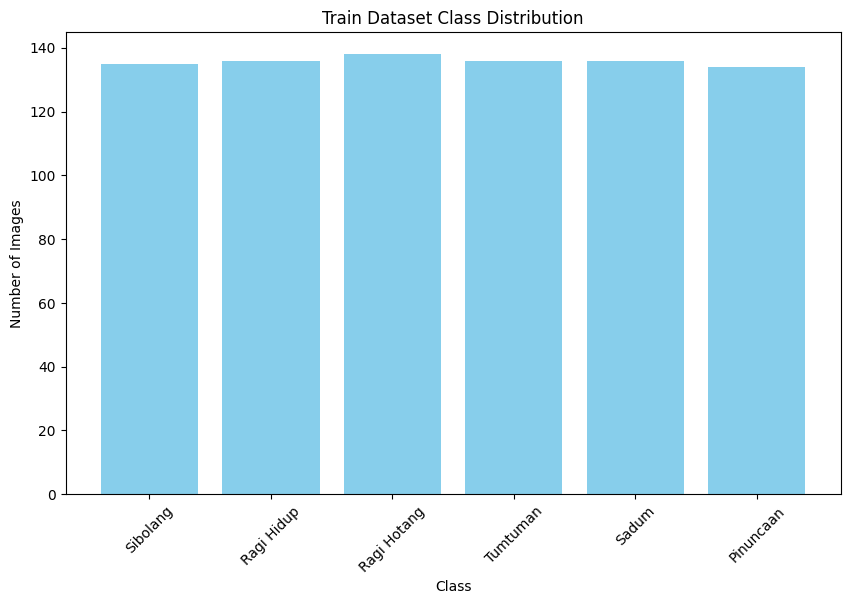

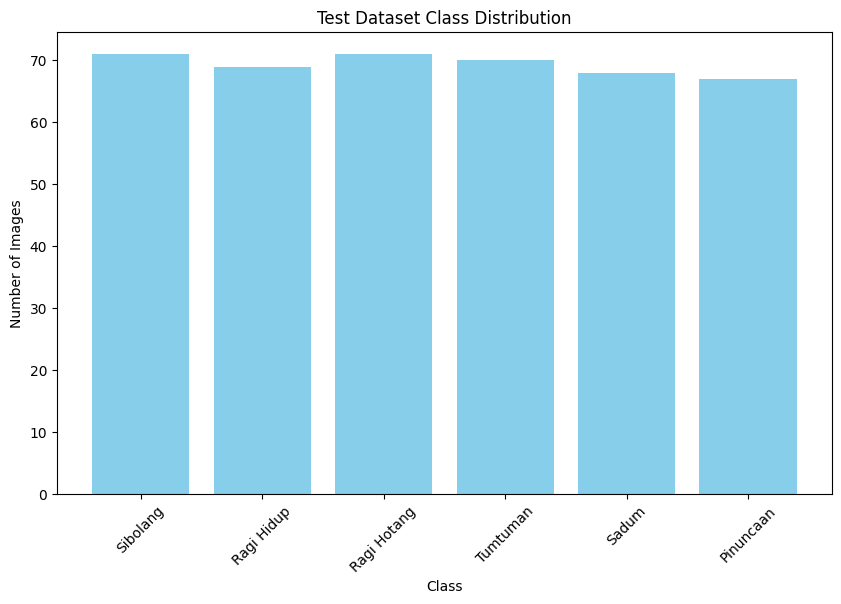

In [ ]:
# Class distribution visualization
def visualize_class_distribution(distribution, title):
    plt.figure(figsize=(10, 6))
    plt.bar(distribution.keys(), distribution.values(), color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

visualize_class_distribution(train_distribution, "Train Dataset Class Distribution")
visualize_class_distribution(test_distribution, "Test Dataset Class Distribution")


Sample Images from Train Dataset:


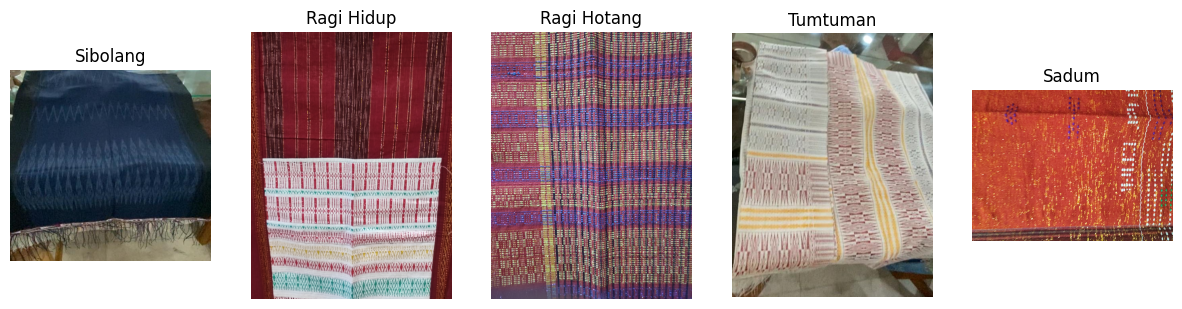

In [ ]:
# Menampilkan contoh gambar dari beberapa kelas
def show_sample_images(path):
    plt.figure(figsize=(15, 10))
    for i, cls in enumerate(img_classes[:5]):
        class_dir = os.path.join(path, cls)
        img_name = os.listdir(class_dir)[0]
        img_path = os.path.join(class_dir, img_name)
        with Image.open(img_path) as img:
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis("off")
    plt.show()

print("Sample Images from Train Dataset:")
show_sample_images(train_path)


In [ ]:
# Analyze file formats and pixel data types
def analyze_image_properties(path):
    formats = []
    modes = []
    for cls in img_classes:
        class_dir = os.path.join(path, cls)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:
                formats.append(img.format)
                modes.append(img.mode)
    format_counts = Counter(formats)
    mode_counts = Counter(modes)
    return format_counts, mode_counts

train_formats, train_modes = analyze_image_properties(train_path)

print("\nTrain Dataset Image Formats:")
for fmt, count in train_formats.items():
    print(f"  - {fmt}: {count} images")

print("\nTrain Dataset Pixel Modes:")
for mode, count in train_modes.items():
    print(f"  - {mode}: {count} images")


Train Dataset Image Formats:
  - JPEG: 622 images
  - PNG: 193 images

Train Dataset Pixel Modes:
  - RGB: 653 images
  - RGBA: 162 images


# DATA PREPARATION

## Remove Dodgy Image in Training Data

In [ ]:
# remove the dodgy image

img_ext = ['jpg', 'jpeg', 'bmp', 'png']

for image_class in img_classes:
    for image in os.listdir(os.path.join(train_path, image_class)):
        image_path = os.path.join(train_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            format = imghdr.what(image_path)
            if format not in img_ext:
                print(f'image {image_path} format not in the list')
                print(image.index())
                os.remove(image_path)
        except Exception as e:
            print(f'there\'s issue with image {image_path}')
            # os.remove(image_path)

# LOAD AND SPLIT DATASET

In [ ]:
# define parameters
batch_size = 16
images_size = (299, 299)
val_split = 0.2
seed = 123

# Load and split the complete dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=val_split,
    subset="training",
    seed=seed,
    image_size=images_size,
    batch_size=batch_size,
    shuffle=True
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=val_split,
    subset="validation",
    seed=seed,
    image_size=images_size,
    batch_size=batch_size,
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=images_size,
    batch_size=batch_size,
    seed=seed,
    shuffle=True
)

Found 815 files belonging to 6 classes.
Using 652 files for training.
Found 815 files belonging to 6 classes.
Using 163 files for validation.
Found 416 files belonging to 6 classes.


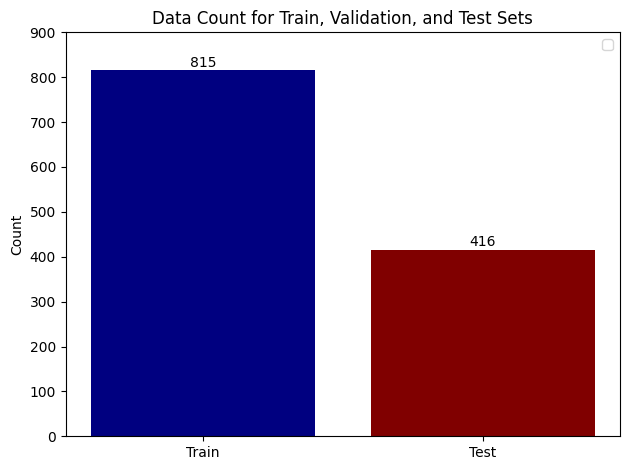

In [ ]:
# Data
data_count = [815,416]
labels = ['Train', 'Test']

# Create a color map from 'inferno'
cmap = plt.get_cmap('jet')
colors = cmap(np.linspace(0, 1, len(data_count)))

# Create barplot
fig, ax = plt.subplots()
bars = ax.bar(labels, data_count, color=colors)

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom')

# Set y-axis limit
ax.set_ylim(0, 900)

# Add title and labels
ax.set_title('Data Count for Train, Validation, and Test Sets')
ax.set_ylabel('Count')

# Show plot
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# train dataset
for images, labels in train_data.take(1):
    print(f"images for each batches: {labels.shape}")

images for each batches: (16,)


## Data Augmentation

In [ ]:
# Define the data augmentation pipeline
!pip install keras_cv
import keras_cv
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Resizing(299, 299),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomBrightness(0.2),
    keras_cv.layers.RandomShear(0.2, fill_mode='reflect'), # Use keras_cv.layers.RandomShear
])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 38.0 MB/s eta 0:00:00


In [ ]:
# Resizing the Dataset
# Define augmented_train first
# Apply data augmentation to the training dataset
augmented_train = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))

augmented_train = augmented_train.map(
    lambda x, y: (tf.image.resize(x, [299, 299]), y)
)

# Normalize the images before resizing for val
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_val = val_data.map(lambda x, y: (normalization_layer(x), y))


normalized_val = normalized_val.map(
    lambda x, y: (tf.image.resize(x, [299, 299]), y)
)

In [ ]:
# Apply data augmentation to the training dataset
augmented_train = train_data.map(lambda x, y: (data_augmentation(x, training=True), y))

## Data Normalization

In [ ]:
# Normalize the images
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
# Apply data normalization to the datasets
normalized_train = augmented_train.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_data.map(lambda x, y: (normalization_layer(x), y))
normalized_test = test_data.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
normalized_train = normalized_train.prefetch(buffer_size=AUTOTUNE)
normalized_val = normalized_val.prefetch(buffer_size=AUTOTUNE)
normalized_test = normalized_test.prefetch(buffer_size=AUTOTUNE)

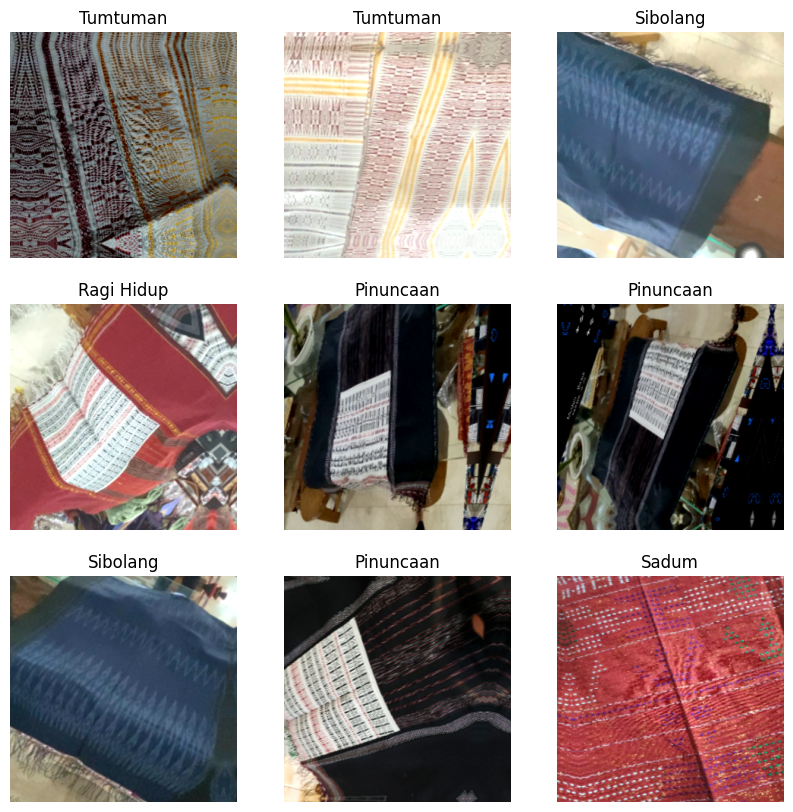

In [ ]:
# Visualize some training images
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in normalized_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

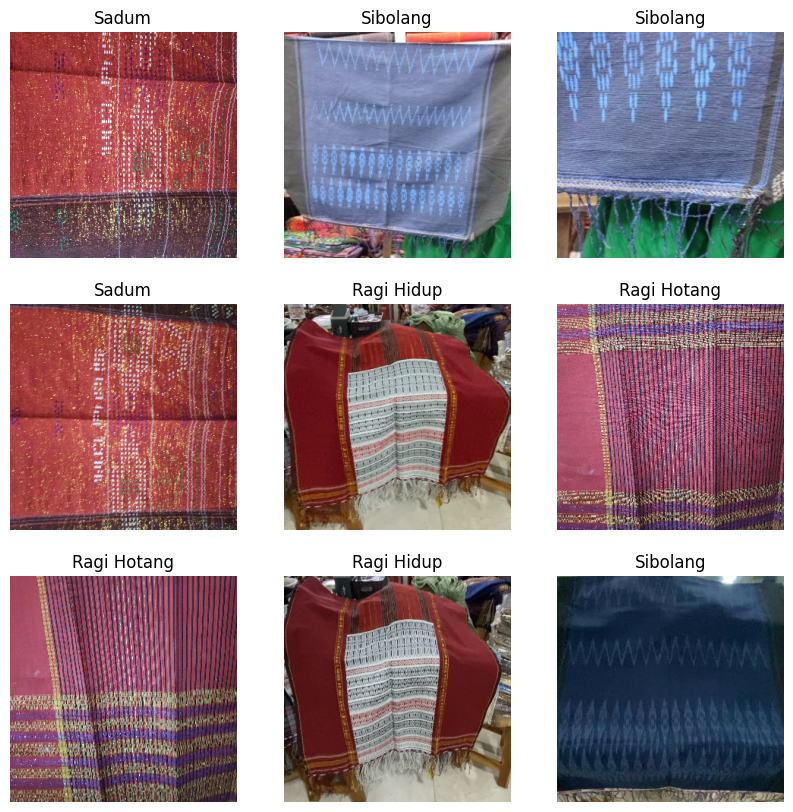

In [ ]:
# Visualize some testing images
class_names = test_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in normalized_test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

## Build Model

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight

In [ ]:
# Hitung jumlah kelas
class_names = train_data.class_names
num_classes = len(class_names)

# Definisikan y_true
y_true = []
for _, labels in train_data.unbatch():
    y_true.append(labels.numpy())
y_true = np.array(y_true)

# Hitung class weights
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.arange(num_classes),
    y=y_true
)
class_weights_dict = dict(enumerate(class_weights))

print("Class weights:", class_weights_dict)

Class weights: {0: 1.0550161812297734, 1: 0.978978978978979, 2: 0.9969418960244648, 3: 1.0759075907590758, 4: 0.9616519174041298, 5: 0.9449275362318841}


In [ ]:
# Define the input size
images_size = (299, 299)
input_shape = (299, 299, 3)

# Load EfficientNetB3
from tensorflow.keras.applications import EfficientNetB3

base_model = EfficientNetB3(include_top=False, weights="imagenet", input_shape=input_shape)
base_model.trainable = False

print(f"Base model loaded with input shape: {input_shape}")

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Base model loaded with input shape: (299, 299, 3)


In [ ]:
# Define input shape (299, 299, 3)
input_shape = (299, 299, 3)

# Load EfficientNetB3 base model
base_model = EfficientNetB3(include_top=False, weights="imagenet", input_shape=input_shape)
base_model.trainable = False

In [ ]:
# Define the model architecture
inputs = Input(shape=(299, 299, 3))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation="softmax")(x)

In [ ]:
# Build the model by assigning it to the variable 'model'
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb3 (Functional)          │ (None, None, None, 1536)    │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1536)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,178,549 (42.64 MB)

 Trainable params: 395,014 (1.51 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [ ]:
# Build the model
model = Model(inputs, outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, min_lr=1e-7)
model_checkpoint = ModelCheckpoint("best_efficientnet_model.keras", monitor="val_loss", save_best_only=True)

# Combine callbacks
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [ ]:
history = model.fit(
    augmented_train,
    validation_data=normalized_val,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 365s 8s/step - accuracy: 0.2391 - loss: 6.2361 - val_accuracy: 0.2147 - val_loss: 6.0308 - learning_rate: 1.0000e-04
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 341s 7s/step - accuracy: 0.4414 - loss: 5.6205 - val_accuracy: 0.1779 - val_loss: 5.9132 - learning_rate: 1.0000e-04
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 335s 8s/step - accuracy: 0.6161 - loss: 5.1617 - val_accuracy: 0.1779 - val_loss: 5.7969 - learning_rate: 1.0000e-04
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 328s 8s/step - accuracy: 0.7389 - loss: 4.8125 - val_accuracy: 0.1779 - val_loss: 5.6822 - learning_rate: 1.0000e-04
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.7712 - loss: 4.5228 - val_accuracy: 0.1779 - val_loss: 5.5605 - learning_rate: 1.0000e-04
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 335s 8s/step - accuracy: 0.8239 - loss: 4.2709 - val_accuracy: 0.1779 - val_loss: 5.4470 - learning_rate: 1.0000e-04
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 330s 8s/step - accuracy: 0.8343 

In [ ]:
# Set EfficientNet sebagai trainable
base_model.trainable = True

# Freeze the first few layers
for layer in base_model.layers[:150]:
    layer.trainable = False

# Recompile the model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-tune model
history_finetune = model.fit(
    augmented_train,
    validation_data=normalized_val,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 586s 13s/step - accuracy: 0.6376 - loss: 3.0927 - val_accuracy: 0.1779 - val_loss: 3.9215 - learning_rate: 1.0000e-05
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 506s 11s/step - accuracy: 0.8304 - loss: 2.7910 - val_accuracy: 0.1779 - val_loss: 3.9051 - learning_rate: 1.0000e-05
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 515s 12s/step - accuracy: 0.8750 - loss: 2.7150 - val_accuracy: 0.1779 - val_loss: 3.8938 - learning_rate: 1.0000e-05
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 533s 12s/step - accuracy: 0.8853 - loss: 2.6037 - val_accuracy: 0.1779 - val_loss: 3.8842 - learning_rate: 1.0000e-05
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 489s 12s/step - accuracy: 0.9258 - loss: 2.4580 - val_accuracy: 0.1779 - val_loss: 3.8752 - learning_rate: 1.0000e-05
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 508s 12s/step - accuracy: 0.9435 - loss: 2.4094 - val_accuracy: 0.1779 - val_loss: 3.8667 - learning_rate: 1.0000e-05
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 511s 12s/step - accuracy: 

# Evaluasi Model

In [ ]:
# Compile the model again before evaluation
model.compile(
    optimizer=Adam(learning_rate=1e-5), # or your preferred optimizer for evaluation
    loss="sparse_categorical_crossentropy",  # Match the loss used during training
    metrics=["accuracy"]
)


# Evaluasi Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(normalized_test)  # 'model' is now defined and trained
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# ... (Rest of your code) ...

26/26 ━━━━━━━━━━━━━━━━━━━━ 132s 5s/step - accuracy: 0.1706 - loss: 6.1940
Test Loss: 6.1976
Test Accuracy: 0.1707


In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Get predictions for the test data
y_pred = model.predict(normalized_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# Get true labels for the test data
y_true_test = []
for images, labels in normalized_test.unbatch():  # Iterate through test dataset
    y_true_test.append(labels.numpy())
y_true_test = np.array(y_true_test)

# Precision, Recall, F1-Score (Macro Average)
precision_macro = precision_score(y_true_test, y_pred, average='macro') # Use y_true_test
recall_macro = recall_score(y_true_test, y_pred, average='macro') # Use y_true_test
f1_macro = f1_score(y_true_test, y_pred, average='macro') # Use y_true_test

# Create a DataFrame for the table
macro_metrics = {
    "Metric": ["Precision", "Recall", "F1-Score"],
    "Average": [precision_macro, recall_macro, f1_macro]
}

metrics_table = pd.DataFrame(macro_metrics)

# Displays the table
print(metrics_table)

26/26 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step
      Metric   Average
0  Precision  0.028446
1     Recall  0.166667
2   F1-Score  0.048597


In [ ]:
26/26 ━━━━━━━━━━━━━━━━━━━━ 151s 6s/step
      Metric   Average
0  Precision  0.028446
1     Recall  0.166667
2   F1-Score  0.048597